# **Problem Statement**

There are various types of MRI that have the ability to capture different types of abnormalities. However, one type of MRI may not be sufficient in capturing a particular type of abnormality. In this case, having another type of MRI may enhance the accuracy of a diagnosis, thus leading to better treatment of the patient.



However, gaining access to different imaging techniques is difficult and expensive. Also, doctors often prescribe one type of MRI at once, but what if you could create another type of MRI from the one that we already have? Moreover, without investing the same amount of time and money?

With the help of deep learning, we can use style transfer to generate artificial MRI images of different contrast levels from existing MRI scans. This will help to provide a better diagnosis with the help of an additional image.

We'll build a Generative adversarial model(modified U-Net) which can generate artificial MRI images of different contrast levels from existing MRI scans.

In this solution, we will use CycleGAN to translate the style of one MRI image to another, which will help in a better understanding of the scanned image. Using GANs we will create T2 weighted images from T1 weighted MRI image and vice-versa.

# **Importing Libraries**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import imageio
import glob
from PIL import Image
from tensorflow.keras.utils import plot_model


# **Data Loading**

In [2]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving MRI+T1_T2+Dataset.RAR to MRI+T1_T2+Dataset.RAR


In [3]:
import os
rar_file = 'MRI+T1_T2+Dataset.RAR'
!unrar x {rar_file} # unrar file
print("Extracted files and directories:", os.listdir())


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from MRI+T1_T2+Dataset.RAR

Creating    Tr1                                                       OK
Extracting  Tr1/.DS_Store                                                  0%  OK 
Creating    Tr1/TrainT1                                               OK
Extracting  Tr1/TrainT1/Image #10.png                                      1%  OK 
Extracting  Tr1/TrainT1/Image #11.png                                      2%  OK 
Extracting  Tr1/TrainT1/Image #12.png                                      3%  OK 
Extracting  Tr1/TrainT1/Image #13.png                                      4%  OK 
Extracting  Tr1/TrainT1/Image #14.png                                      5%  OK 
Extracting  Tr1/TrainT1/Image #15.png                                      6%  OK 
Extracting  Tr1/TrainT1/Image #16.png                                      7%  OK 
Ext

In [4]:

# List the contents of Tr1 and Tr2
print("Contents of Tr1:", os.listdir('Tr1'))
print("Contents of Tr2:", os.listdir('Tr2'))

Contents of Tr1: ['TrainT1', '.DS_Store']
Contents of Tr2: ['.DS_Store', 'TrainT2']


In [5]:
print("Contents of TrainT1:", os.listdir(os.path.join('Tr1', 'TrainT1')))
print("Contents of TrainT2:", os.listdir(os.path.join('Tr2', 'TrainT2')))

# Set the directory containing the images
extracted_dir = os.path.join('Tr1', 'TrainT1')

# Use glob to find all .png files in the specified directory
t1ImagesList = glob.glob(os.path.join(extracted_dir, '*.png'))
print("List of image files:", t1ImagesList)

Contents of TrainT1: ['Image #55.png', 'Image #36.png', 'Image #11.png', 'Image #10.png', 'Image #52.png', 'Image #45.png', 'Image #35.png', 'Image #31.png', 'Image #29.png', 'Image #42.png', 'Image #16.png', 'Image #38.png', 'Image #25.png', 'Image #26.png', 'Image #43.png', 'Image #49.png', 'Image #46.png', 'Image #54.png', 'Image #15.png', 'Image #32.png', 'Image #23.png', 'Image #53.png', 'Image #51.png', 'Image #44.png', 'Image #14.png', 'Image #12.png', 'Image #41.png', 'Image #17.png', 'Image #47.png', 'Image #50.png', 'Image #28.png', 'Image #19.png', 'Image #24.png', 'Image #30.png', 'Image #48.png', 'Image #13.png', 'Image #39.png', 'Image #18.png', 'Image #34.png', 'Image #37.png', 'Image #33.png', 'Image #27.png', 'Image #40.png']
Contents of TrainT2: ['Image #117.png', 'Image #89.png', 'Image #93.png', 'Image #88.png', 'Image #85.png', 'Image #73.png', 'Image #98.png', 'Image #91.png', 'Image #76.png', 'Image #83.png', 'Image #86.png', 'Image #71.png', 'Image #75.png', 'Im

In [6]:
extracted_dir =  os.path.join('Tr1', 'TrainT1')

In [7]:
# Step 6: Use glob to find all .png files in the extracted directory
t1ImagesList = glob.glob(os.path.join(extracted_dir, '*.png'))
print("List of image files:", t1ImagesList)

# Step 7: Read and convert images to numpy arrays
if t1ImagesList:
    t1Images = np.array([np.array(imageio.imread(fname)) for fname in t1ImagesList])
    # Step 8: Check the shape of the resulting array
    print("Shape of t1Images array:", t1Images.shape)
else:
    print("No images found. Please check the file path or upload files again.")

List of image files: ['Tr1/TrainT1/Image #55.png', 'Tr1/TrainT1/Image #36.png', 'Tr1/TrainT1/Image #11.png', 'Tr1/TrainT1/Image #10.png', 'Tr1/TrainT1/Image #52.png', 'Tr1/TrainT1/Image #45.png', 'Tr1/TrainT1/Image #35.png', 'Tr1/TrainT1/Image #31.png', 'Tr1/TrainT1/Image #29.png', 'Tr1/TrainT1/Image #42.png', 'Tr1/TrainT1/Image #16.png', 'Tr1/TrainT1/Image #38.png', 'Tr1/TrainT1/Image #25.png', 'Tr1/TrainT1/Image #26.png', 'Tr1/TrainT1/Image #43.png', 'Tr1/TrainT1/Image #49.png', 'Tr1/TrainT1/Image #46.png', 'Tr1/TrainT1/Image #54.png', 'Tr1/TrainT1/Image #15.png', 'Tr1/TrainT1/Image #32.png', 'Tr1/TrainT1/Image #23.png', 'Tr1/TrainT1/Image #53.png', 'Tr1/TrainT1/Image #51.png', 'Tr1/TrainT1/Image #44.png', 'Tr1/TrainT1/Image #14.png', 'Tr1/TrainT1/Image #12.png', 'Tr1/TrainT1/Image #41.png', 'Tr1/TrainT1/Image #17.png', 'Tr1/TrainT1/Image #47.png', 'Tr1/TrainT1/Image #50.png', 'Tr1/TrainT1/Image #28.png', 'Tr1/TrainT1/Image #19.png', 'Tr1/TrainT1/Image #24.png', 'Tr1/TrainT1/Image #3

<ipython-input-7-7547e83f83a2>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  t1Images = np.array([np.array(imageio.imread(fname)) for fname in t1ImagesList])


In [8]:
# repeating the same process for TrainT2
extracted_dir2 = os.path.join('Tr2', 'TrainT2')

In [9]:
t2ImagesList = glob.glob(os.path.join(extracted_dir2, '*.png'))
t2Images = np.array([np.array(imageio.imread(fname)) for fname in t2ImagesList])
t2Images.shape

<ipython-input-9-15795169affb>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  t2Images = np.array([np.array(imageio.imread(fname)) for fname in t2ImagesList])


(46, 217, 181)

# **Data Visualization of Image containing T1 and T2**

In [10]:
# Declaring batch size
BATCH_SIZE = 5

In [11]:
t1Images = (t1Images/127.5)-1.0 # Normalize the images to [-1.0, 1.0]
t1Images.shape

(43, 217, 181)

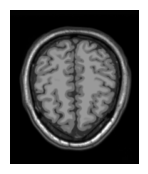

In [12]:
plt.figure(figsize=(2, 2))
plt.imshow(t1Images[0], cmap='gray')
plt.axis('off')
plt.show()

In [13]:
t2Images = (t2Images/127.5)-1.0 # Normalize the images to [-1.0, 1.0]
t2Images.shape

(46, 217, 181)

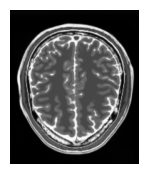

In [14]:
plt.figure(figsize=(2, 2))
plt.imshow(t2Images[0], cmap='gray')
plt.axis('off')
plt.show()

# **Data Processing**

**Resizing image to size (256,256)**

In [15]:
height = 256
width = 256

In [16]:
t1Images_data = np.zeros((t1Images.shape[0], height, width))
for index, img in enumerate(t1Images):
    t1Images_data[index, :, :] = resize(np.pad(img, ((19, 20), (37, 38)), 'minimum'), (height, width))
print(t1Images_data.shape)

t2Images_data = np.zeros((t2Images.shape[0], height, width))
for index, img in enumerate(t2Images):
    t2Images_data[index, :, :] = resize(np.pad(img, ((19, 20), (37, 38)), 'minimum'), (height, width))
print(t2Images_data.shape)

(43, 256, 256)
(46, 256, 256)


**Reshaping the image to (256,256,1) with float pixel values**

In [17]:
t1Images_data = t1Images_data.reshape(t1Images_data.shape[0], height, width, 1).astype('float32')
t2Images_data = t2Images_data.reshape(t2Images_data.shape[0], height, width, 1).astype('float32')

**Batch and shuffle the data**

In [18]:
t1Images_data = tf.data.Dataset.from_tensor_slices(t1Images_data).shuffle(t1Images_data.shape[0], seed=42).batch(BATCH_SIZE)
t2Images_data = tf.data.Dataset.from_tensor_slices(t2Images_data).shuffle(t2Images_data.shape[0], seed=42).batch(BATCH_SIZE)

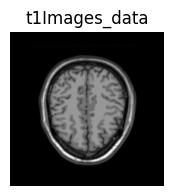

In [19]:
sample_t1Images_data = next(iter(t1Images_data))
plt.figure(figsize=(2, 2))
plt.imshow(sample_t1Images_data[0].numpy()[:, :], cmap='gray')
plt.title('t1Images_data')
plt.axis('off')
plt.show()

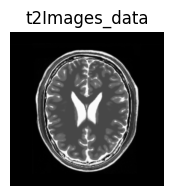

In [20]:
sample_t2Images_data = next(iter(t2Images_data))
plt.figure(figsize=(2, 2))
plt.imshow(sample_t2Images_data[0].numpy()[:, :], cmap='gray')
plt.title('t2Images_data')
plt.axis('off')
plt.show()

# **Model Building**

**Instance normalization**

Instance Normalization are specially used with Style Transfer, where Separate Normalization is performed for each sample we perform channelwise Normalization.

In [21]:
class InstanceNormalization(tf.keras.layers.Layer):
    # Initialization of Objects
    def __init__(self, epsilon=1e-5):
        # calling parent's init
        super(InstanceNormalization, self).__init__()
        self.epsilon = epsilon

    def build(self, input_shape):
        self.scale = self.add_weight(
            name='scale',
            shape=input_shape[-1:],
            initializer=tf.random_normal_initializer(1., 0.02),
            trainable=True)
        self.offset = self.add_weight(
            name='offset',
            shape=input_shape[-1:],
            initializer='zeros',
            trainable=True)

    def call(self, x):
        # Compute Mean and Variance, Axes=[1,2] ensures Instance Normalization
        mean, variance = tf.nn.moments(x, axes=[1, 2], keepdims=True)
        inv = tf.math.rsqrt(variance + self.epsilon)
        normalized = (x - mean) * inv
        return self.scale * normalized + self.offset

**Downsampeling**

It is performed to reduce dimension.

In [22]:
def downsample(filters, size, apply_norm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    # Add Conv2d layer
    result.add(tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                                      kernel_initializer=initializer, use_bias=False))
    # Add Normalization layer
    if apply_norm:
        result.add(InstanceNormalization())
    # Add Leaky Relu Activation
    result.add(tf.keras.layers.LeakyReLU())
    return result

**Upsampling**

Upsampling is a result of Transposed Convolution, where dimension of image are increased.

In [23]:
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    # Add Transposed Conv2d layer
    result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2, padding='same',
                                               kernel_initializer=initializer, use_bias=False))
    # Add Normalization Layer
    result.add(InstanceNormalization())
    # Conditionally add Dropout layer
    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))
    # Add Relu Activation Layer
    result.add(tf.keras.layers.ReLU())
    return result

**Unets**

Unets takes Image as an input and translate it into another Image. <p>
To do this, first use Downsampling on Input Image to learn the latent characteristics of Input Image and then use Upsampling to use this knowledge to Translate it into another Image.

In [24]:
# Unet Generator is a combination of Convolution + Transposed Convolution Layers
def unet_generator():
    down_stack = [
        downsample(64, 4, False), # (bs, 256, 256, 64)
        downsample(128, 4), # (bs, 128, 128, 128)
        downsample(256, 4), # (bs, 64, 64, 128)
        downsample(512, 4), # (bs, 32, 32, 128)
        downsample(256, 4), # (bs, 16, 16, 128)
        downsample(512, 4, True), # (bs, 8, 8, 128)
        downsample(256, 4), # (bs, 4, 4, 128)
        downsample(128, 4), # (bs, 2, 2, 128)
    ]
    up_stack = [
        upsample(128, 4), # (bs, 2, 2, 256)
        upsample(128, 4), # (bs, 4, 4, 256)
        upsample(256, 4, True), # (bs, 8, 8, 256)
        upsample(512, 4), # (bs, 16, 16, 256)
        upsample(128, 4), # (bs, 32, 32, 256)
        upsample(256, 4, True), # (bs, 64, 64, 256)
        upsample(128, 4), # (bs, 128, 128, 128)
        upsample(64, 4) # (bs, 128, 128, 128)
    ]
    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(1, 4, strides=2, padding='same', kernel_initializer=initializer,
                                           activation='tanh') # (bs, 256, 256, 1)
    concat = tf.keras.layers.Concatenate()
    inputs = tf.keras.layers.Input(shape=[height, width, 1])
    x = inputs
    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])
    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = concat([x, skip])
    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)


# Generator

Generator is a Unet Network here since We want to translate One type of Image (digit 4) into Another type of Image (digit 9).

In [25]:
generator_g = unet_generator()
generator_f = unet_generator()

Let's also visualize one of our Generator Models since Both our Generators have same architecture.Notice How the dimension reduces first but then increases.

In [26]:
generator_g.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 128, 128, 64)         1024      ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 64, 64, 128)          131328    ['sequential[0][0]']          
                                                                                                  
 sequential_2 (Sequential)   (None, 32, 32, 256)          524800    ['sequential_1[0][0]']        
                                                                                              

# Driscrimanator

Discriminator is a traditional CNN, which we use to classify the Images. It only uses Downsampling hence both Discriminators have same architecture

In [27]:
# Discriminators only contain Convolutional Layers and no Transposed Convolution is not used
def discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    # add input layer of size (32, 32, 1)
    inp = tf.keras.layers.Input(shape=[height, width, 1], name='input_image')
    x = inp

    # add downsampling step here
    down1 = downsample(64, 4, False)(x) # (bs, 128, 128, 64)
    down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
    down3 = downsample(128, 4)(down2) # (bs, 32, 32, 128)
    down4 = downsample(128, 4)(down3) # (bs, 16, 16, 128)
    down5 = downsample(128, 4)(down4) # (bs, 8, 8, 128)
    down6 = downsample(128, 4)(down5) # (bs, 4, 4, 128)
    # add a padding layer here
    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down6) # (bs, 10, 10, 128)

    # implement a concrete downsampling layer here
    conv = tf.keras.layers.Conv2D(256, 4, strides=1, kernel_initializer=initializer,
                                  use_bias=False)(zero_pad1) # (bs, 7, 7, 256)
    norm1 = InstanceNormalization()(conv)
    leaky_relu = tf.keras.layers.LeakyReLU()(norm1)

    # apply zero padding layer
    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 9, 9, 256)
     # add a last pure 2D Convolution layer
    last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(zero_pad2) # (bs, 6, 6, 1)
    return tf.keras.Model(inputs=inp, outputs=last)

In [28]:
discriminator_x = discriminator()
discriminator_y = discriminator()

Have a look at Discriminator's architecture, Notice that The Dimensions are reducing overall at the end since it's a classifier and only Convolution layers are being used.

In [29]:
discriminator_x.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 256, 256, 1)]     0         
                                                                 
 sequential_32 (Sequential)  (None, 128, 128, 64)      1024      
                                                                 
 sequential_33 (Sequential)  (None, 64, 64, 128)       131328    
                                                                 
 sequential_34 (Sequential)  (None, 32, 32, 128)       262400    
                                                                 
 sequential_35 (Sequential)  (None, 16, 16, 128)       262400    
                                                                 
 sequential_36 (Sequential)  (None, 8, 8, 128)         262400    
                                                                 
 sequential_37 (Sequential)  (None, 4, 4, 128)         2624

# **Model Training**

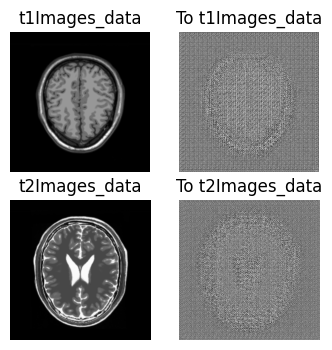

In [30]:
#check output of Untrained Generator models which should be a random noise
to_t1Images_data = generator_g(sample_t1Images_data)
to_t2Images_data = generator_f(sample_t2Images_data)
plt.figure(figsize=(4, 4))

imgs = [sample_t1Images_data, to_t1Images_data, sample_t2Images_data, to_t2Images_data]
title = ['t1Images_data', 'To t1Images_data', 't2Images_data', 'To t2Images_data']

for i in range(len(imgs)):
    plt.subplot(2, 2, i+1)
    plt.title(title[i])
    plt.imshow(imgs[i][0].numpy()[:, :, 0], cmap='gray')
    plt.axis('off')
plt.show()

# Declare Loss as Binary Cross Entropy

Since Our Discriminator is a classifier

In [31]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Discriminator Loss
It consists of two types of losses
1.    Loss on Real Data
2.    Loss on Fake Data

In [32]:
def discriminator_loss(real, generated):
    real_loss = loss_obj(tf.ones_like(real), real)
    generated_loss = loss_obj(tf.zeros_like(generated), generated)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss * 0.5 # mean of losses

# Generator Loss
It has only one type of loss - Discriminator Loss on Generated data

In [33]:
def generator_loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

# Cycle Loss
When we use both of Generators sequentially on a Input Image, we get Cycle Image and the L1 Loss between these two is called Cycle Loss.

In [34]:
def calc_cycle_loss(real_image, cycled_image):
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
    return 10.0 * loss1

# Identity Loss
When we provide input image to the Generator such that no translation is needed because the Image is already transformed. Here also we take L1 Loss between Input and Output Image.

In [35]:
def identity_loss(real_image, same_image):
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return 0.5*loss

# Optimizer
We use Adam Optimizer to update weights which is a good optimizer to achieve quick learning.

In [36]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-5, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-5, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-5, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-5, beta_1=0.5)

In [37]:
# We'll train our model for 100 epoches
epoch = 100

# Checkpoint Initialization
Initialize checkpoints to save models

In [38]:
checkpoint_path = "./Trained_Model"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=3)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

In [39]:
# Function to show images output by generators while training.
import os
import matplotlib.pyplot as plt

def generate_images(model1, test_input1, model2, test_input2, epoch):
    # Ensure the directory exists
    output_dir = 'generatedImages'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    prediction1 = model1(test_input1)
    prediction2 = model2(test_input2)
    plt.figure(figsize=(8, 4))
    display_list = [test_input1[0], prediction1[0], test_input2[0], prediction2[0]]
    title = ['Input Image', 'Predicted Image', 'Input Image', 'Predicted Image']
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i].numpy()[:, :, 0], cmap='gray')
        plt.axis('off')

    # Save the figure
    plt.savefig(os.path.join(output_dir, 'image_at_epoch_{:04d}.png'.format(epoch)))

    plt.show()

# **Training Flow**
Below Function performs one Flow of Batch Training <p>
Notice that Identity Loss and Cycle Loss are only used in training Generator and not Discriminator

**Sequence of Training Flow**


1.   Generate Fake Y and Cycled X
2.   Generate Fake X and Cycled Y
3.   Generate Fake Images through G and F for Identity Loss.
4.   Calculate Discriminator Loss for Disc X and Disc Y on Fake Data for Generator Training.
5.   Calculate Generator Loss on Discriminator.
6.   Calculate Cycled Loss on Cycled Images from step 1 and 2.
7.   Calculate Total Generator Loss - Disc Loss + Cycled Loss + Identity Loss
8.   Calculate Discriminator Loss on both Fake and Real Images for Disc X and Y for Disc Training.
9.   Calculate the Gradients and update the weight and bias of models.


In [40]:
@tf.function
def train_step(real_x, real_y):
    # persistent is set to True because the tape is used more than
    # once to calculate the gradients.
    with tf.GradientTape(persistent=True) as tape:
        # Generator G translates X -> Y
        # Generator F translates Y -> X
        fake_y = generator_g(real_x, training=True)
        cycled_x = generator_f(fake_y, training=True)

        fake_x = generator_f(real_y, training=True)
        cycled_y = generator_g(fake_x, training=True)

        # same_x and same_y are used for identity loss.
        same_x = generator_f(real_x, training=True)
        same_y = generator_g(real_y, training=True)

        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)

        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)

        # calculate the loss
        gen_g_loss = generator_loss(disc_fake_y)
        gen_f_loss = generator_loss(disc_fake_x)

        total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)

        # Total generator loss = BCE loss + cycle loss + identity loss
        total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
        total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

        # Discriminator's loss
        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

    # Calculate the gradients for generator and discriminator
    generator_g_gradients = tape.gradient(total_gen_g_loss, generator_g.trainable_variables)
    generator_f_gradients = tape.gradient(total_gen_f_loss, generator_f.trainable_variables)

    discriminator_x_gradients = tape.gradient(disc_x_loss, discriminator_x.trainable_variables)
    discriminator_y_gradients = tape.gradient(disc_y_loss, discriminator_y.trainable_variables)

    # Apply the gradients to the optimizer
    generator_g_optimizer.apply_gradients(zip(generator_g_gradients, generator_g.trainable_variables))
    generator_f_optimizer.apply_gradients(zip(generator_f_gradients, generator_f.trainable_variables))

    discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients, discriminator_x.trainable_variables))
    discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients, discriminator_y.trainable_variables))

# **Train the CycleGAN Model for several Epochs**
Loop training function for number of epochs and also show the output at each step. <p>
Note how Generators are getting better at producing realistic images epoch by epoch

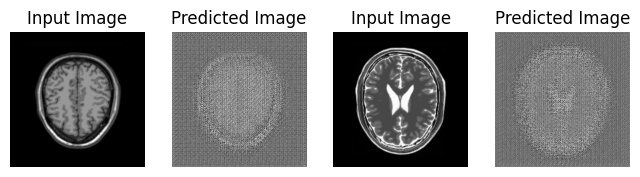

Saving checkpoint for epoch 1 at ./Trained_Model/ckpt-1


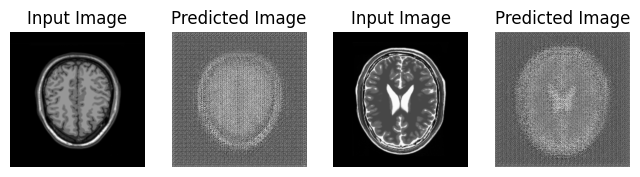

Saving checkpoint for epoch 2 at ./Trained_Model/ckpt-2


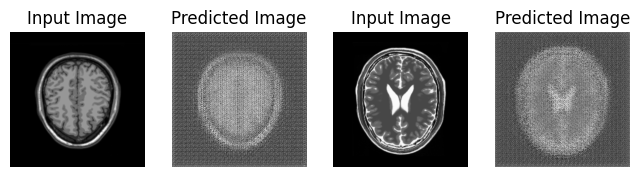

Saving checkpoint for epoch 3 at ./Trained_Model/ckpt-3


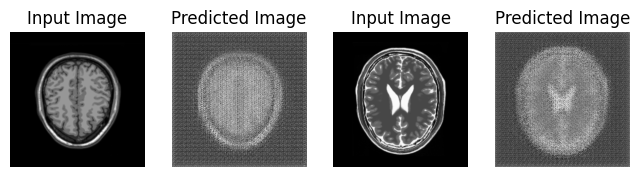

Saving checkpoint for epoch 4 at ./Trained_Model/ckpt-4


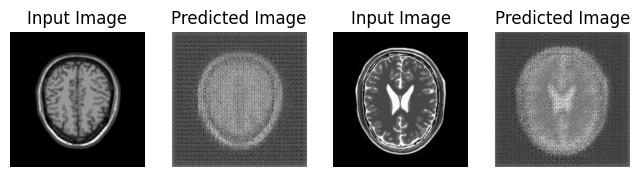

Saving checkpoint for epoch 5 at ./Trained_Model/ckpt-5


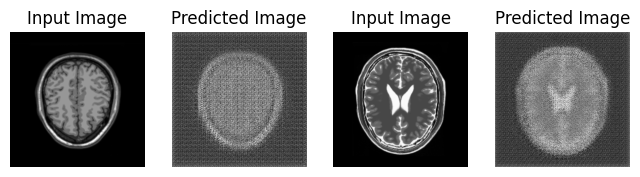

Saving checkpoint for epoch 6 at ./Trained_Model/ckpt-6


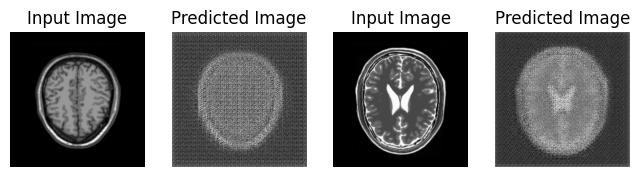

Saving checkpoint for epoch 7 at ./Trained_Model/ckpt-7


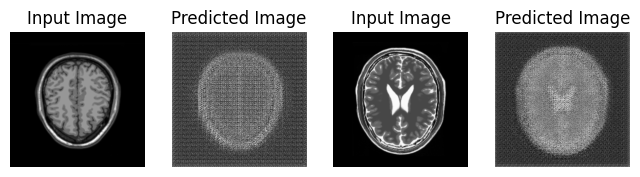

Saving checkpoint for epoch 8 at ./Trained_Model/ckpt-8


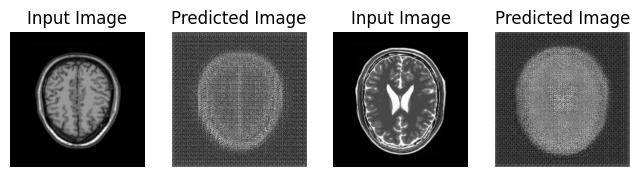

Saving checkpoint for epoch 9 at ./Trained_Model/ckpt-9


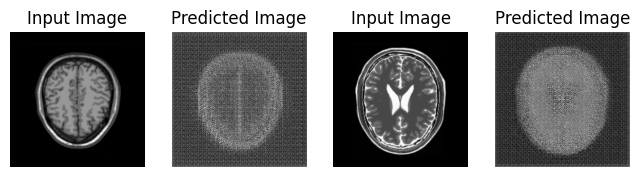

Saving checkpoint for epoch 10 at ./Trained_Model/ckpt-10


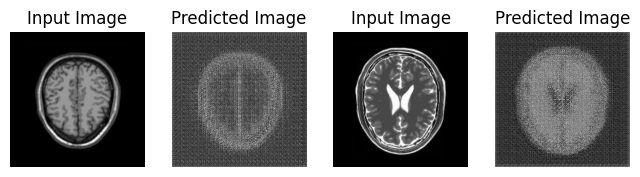

Saving checkpoint for epoch 11 at ./Trained_Model/ckpt-11


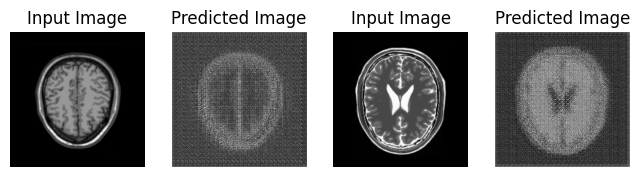

Saving checkpoint for epoch 12 at ./Trained_Model/ckpt-12


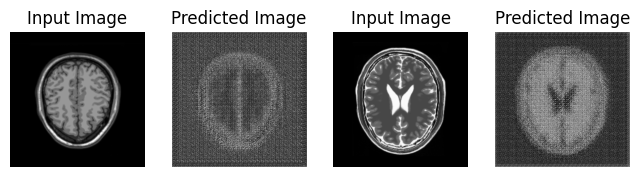

Saving checkpoint for epoch 13 at ./Trained_Model/ckpt-13


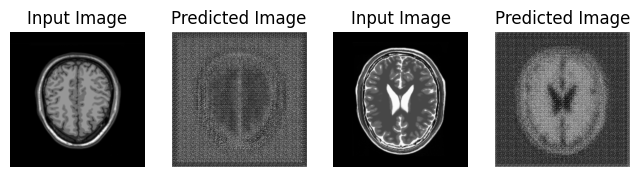

Saving checkpoint for epoch 14 at ./Trained_Model/ckpt-14


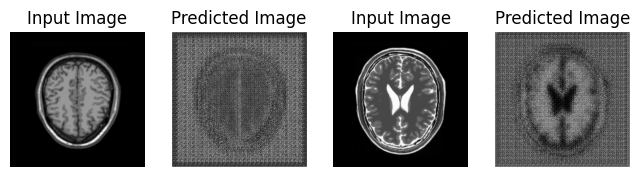

Saving checkpoint for epoch 15 at ./Trained_Model/ckpt-15


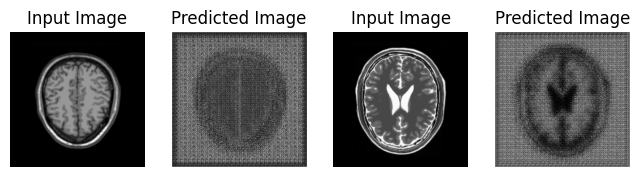

Saving checkpoint for epoch 16 at ./Trained_Model/ckpt-16


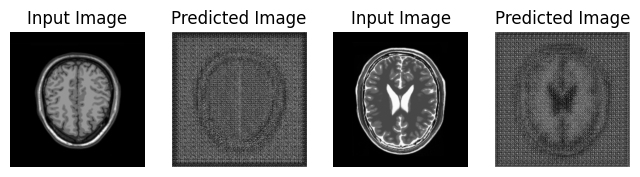

Saving checkpoint for epoch 17 at ./Trained_Model/ckpt-17


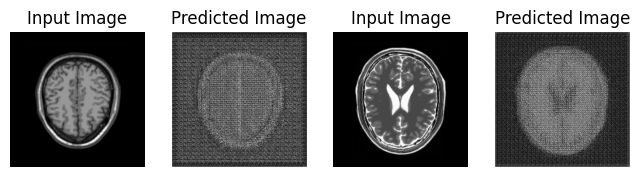

Saving checkpoint for epoch 18 at ./Trained_Model/ckpt-18


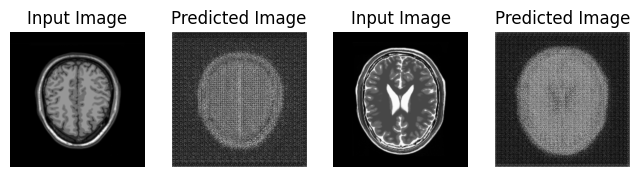

Saving checkpoint for epoch 19 at ./Trained_Model/ckpt-19


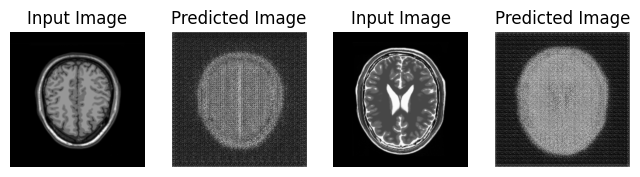

Saving checkpoint for epoch 20 at ./Trained_Model/ckpt-20


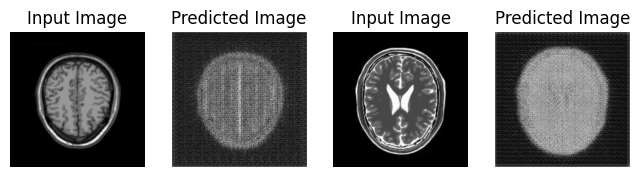

Saving checkpoint for epoch 21 at ./Trained_Model/ckpt-21


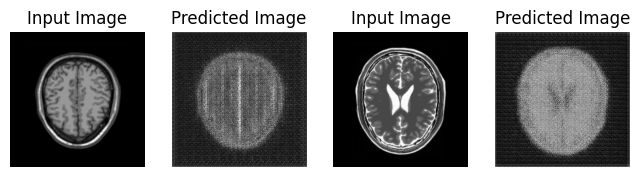

Saving checkpoint for epoch 22 at ./Trained_Model/ckpt-22


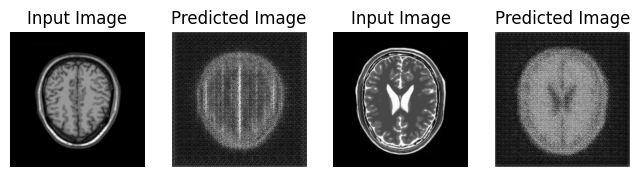

Saving checkpoint for epoch 23 at ./Trained_Model/ckpt-23


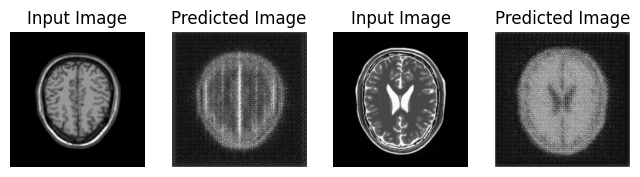

Saving checkpoint for epoch 24 at ./Trained_Model/ckpt-24


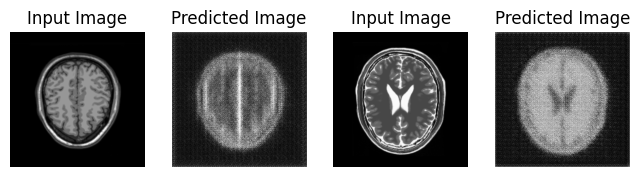

Saving checkpoint for epoch 25 at ./Trained_Model/ckpt-25


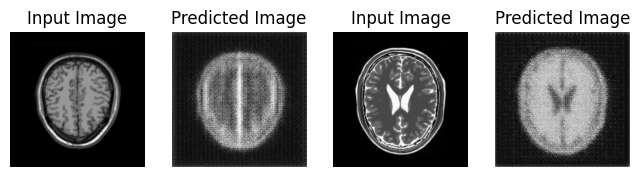

Saving checkpoint for epoch 26 at ./Trained_Model/ckpt-26


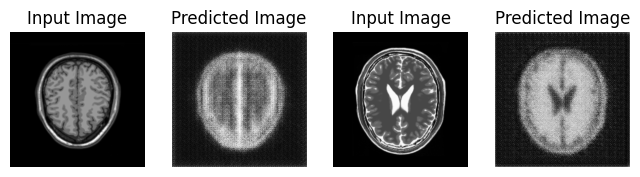

Saving checkpoint for epoch 27 at ./Trained_Model/ckpt-27


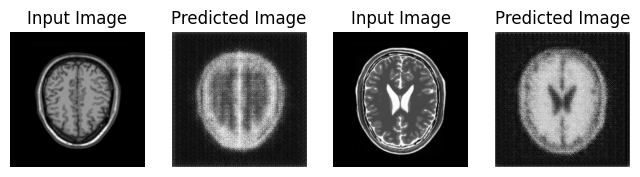

Saving checkpoint for epoch 28 at ./Trained_Model/ckpt-28


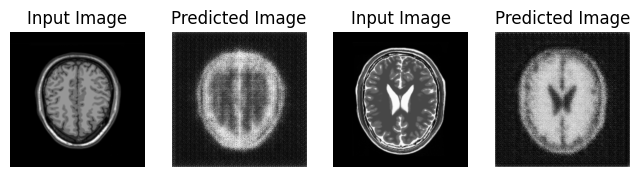

Saving checkpoint for epoch 29 at ./Trained_Model/ckpt-29


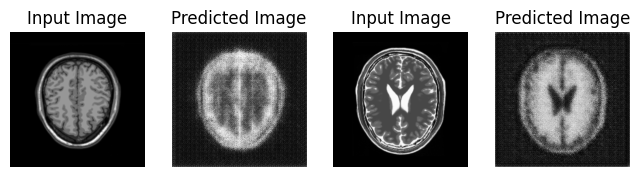

Saving checkpoint for epoch 30 at ./Trained_Model/ckpt-30


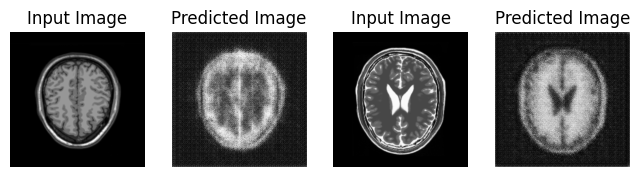

Saving checkpoint for epoch 31 at ./Trained_Model/ckpt-31


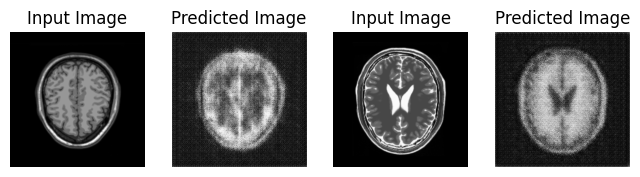

Saving checkpoint for epoch 32 at ./Trained_Model/ckpt-32


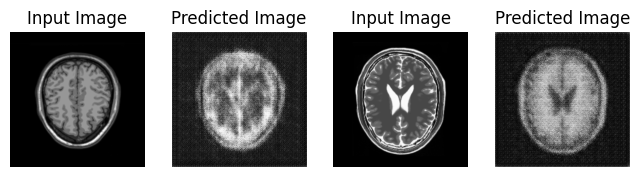

Saving checkpoint for epoch 33 at ./Trained_Model/ckpt-33


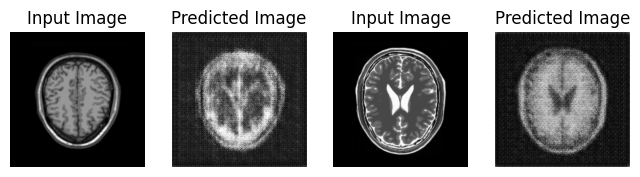

Saving checkpoint for epoch 34 at ./Trained_Model/ckpt-34


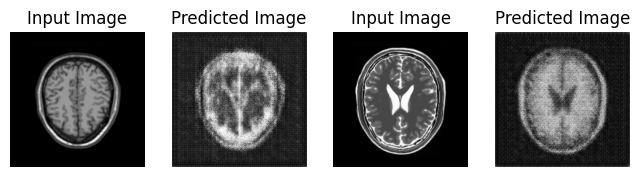

Saving checkpoint for epoch 35 at ./Trained_Model/ckpt-35


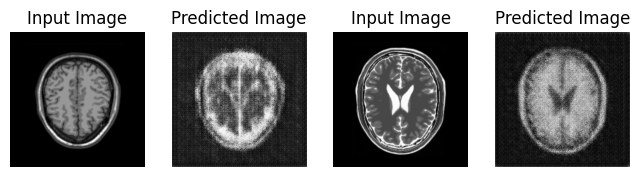

Saving checkpoint for epoch 36 at ./Trained_Model/ckpt-36


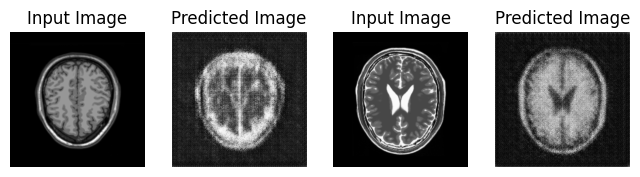

Saving checkpoint for epoch 37 at ./Trained_Model/ckpt-37


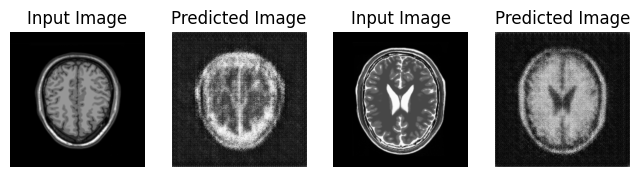

Saving checkpoint for epoch 38 at ./Trained_Model/ckpt-38


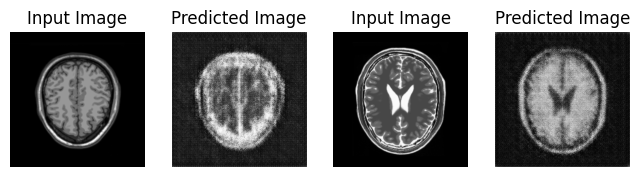

Saving checkpoint for epoch 39 at ./Trained_Model/ckpt-39


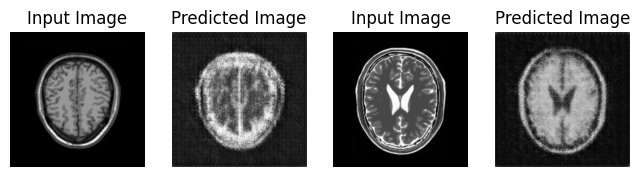

Saving checkpoint for epoch 40 at ./Trained_Model/ckpt-40


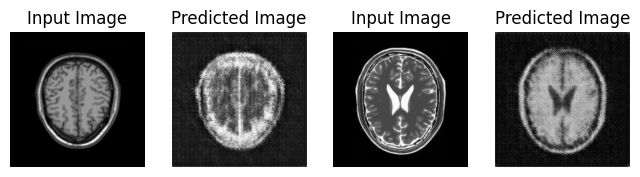

Saving checkpoint for epoch 41 at ./Trained_Model/ckpt-41


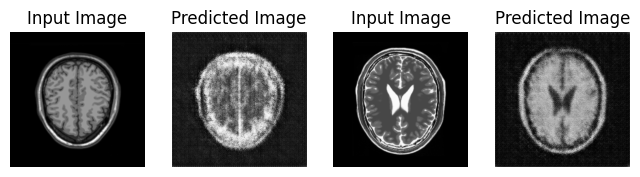

Saving checkpoint for epoch 42 at ./Trained_Model/ckpt-42


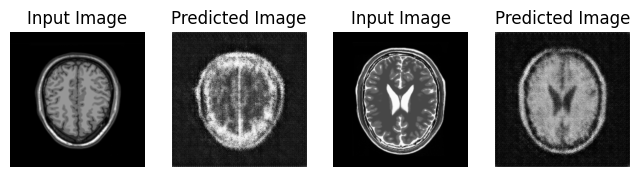

Saving checkpoint for epoch 43 at ./Trained_Model/ckpt-43


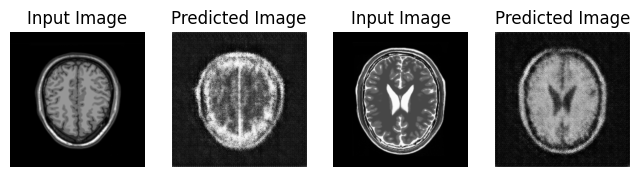

Saving checkpoint for epoch 44 at ./Trained_Model/ckpt-44


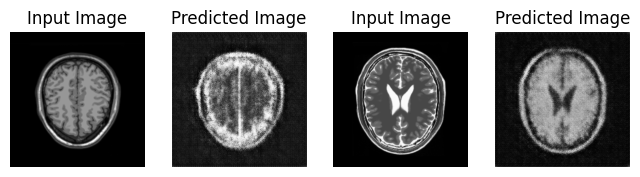

Saving checkpoint for epoch 45 at ./Trained_Model/ckpt-45


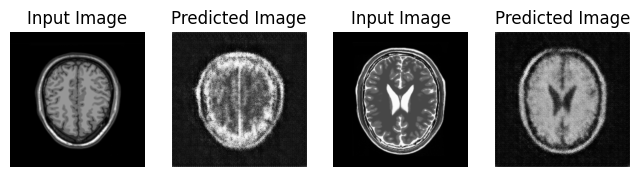

Saving checkpoint for epoch 46 at ./Trained_Model/ckpt-46


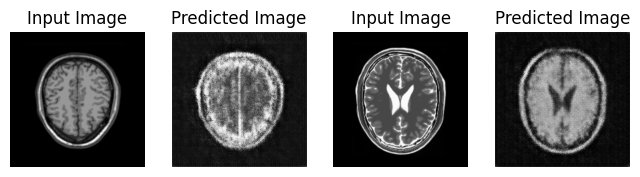

Saving checkpoint for epoch 47 at ./Trained_Model/ckpt-47


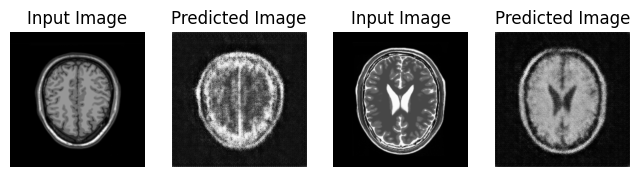

Saving checkpoint for epoch 48 at ./Trained_Model/ckpt-48


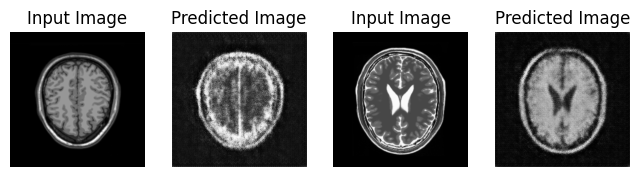

Saving checkpoint for epoch 49 at ./Trained_Model/ckpt-49


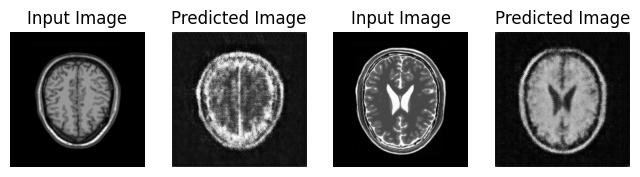

Saving checkpoint for epoch 50 at ./Trained_Model/ckpt-50


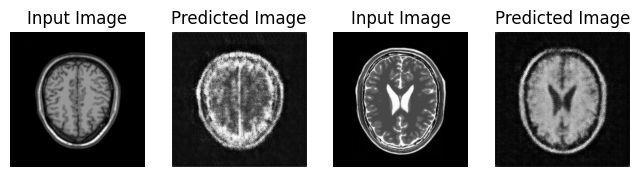

Saving checkpoint for epoch 51 at ./Trained_Model/ckpt-51


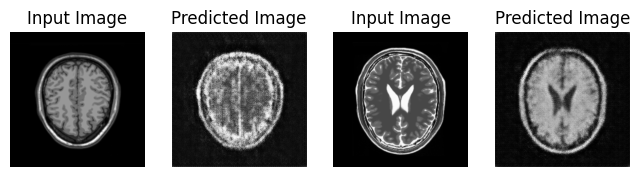

Saving checkpoint for epoch 52 at ./Trained_Model/ckpt-52


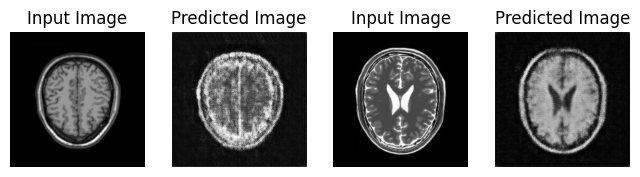

Saving checkpoint for epoch 53 at ./Trained_Model/ckpt-53


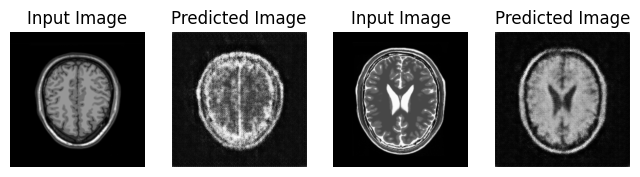

Saving checkpoint for epoch 54 at ./Trained_Model/ckpt-54


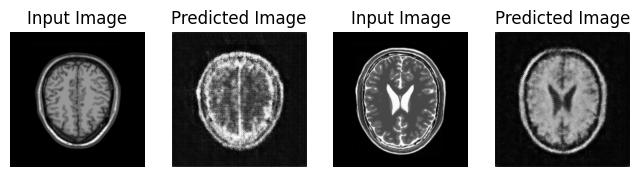

Saving checkpoint for epoch 55 at ./Trained_Model/ckpt-55


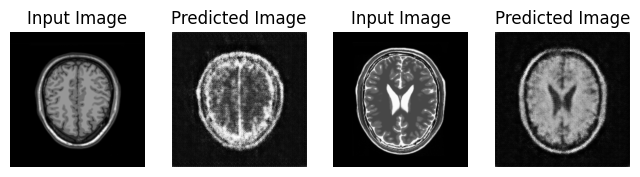

Saving checkpoint for epoch 56 at ./Trained_Model/ckpt-56


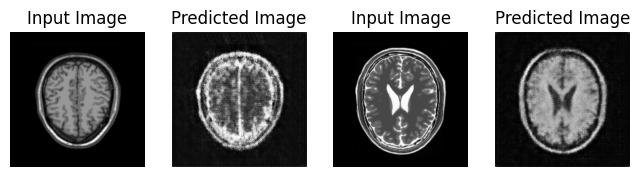

Saving checkpoint for epoch 57 at ./Trained_Model/ckpt-57


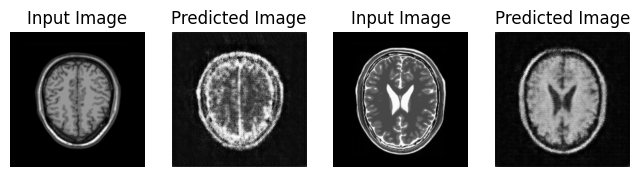

Saving checkpoint for epoch 58 at ./Trained_Model/ckpt-58


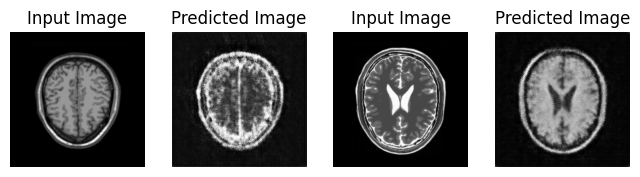

Saving checkpoint for epoch 59 at ./Trained_Model/ckpt-59


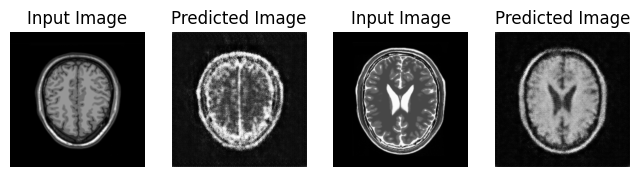

Saving checkpoint for epoch 60 at ./Trained_Model/ckpt-60


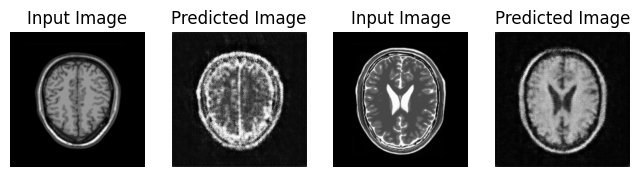

Saving checkpoint for epoch 61 at ./Trained_Model/ckpt-61


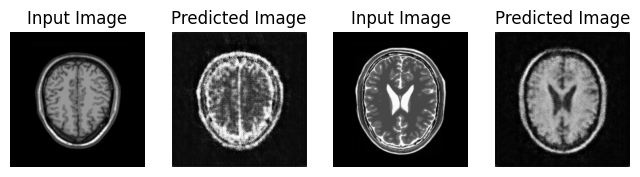

Saving checkpoint for epoch 62 at ./Trained_Model/ckpt-62


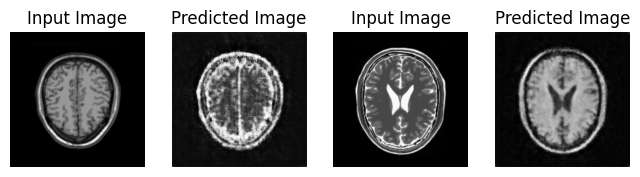

Saving checkpoint for epoch 63 at ./Trained_Model/ckpt-63


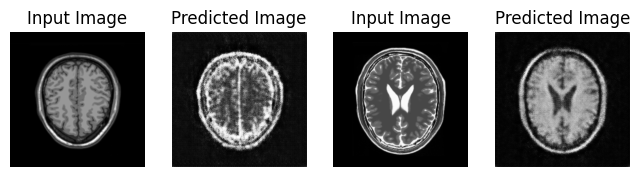

Saving checkpoint for epoch 64 at ./Trained_Model/ckpt-64


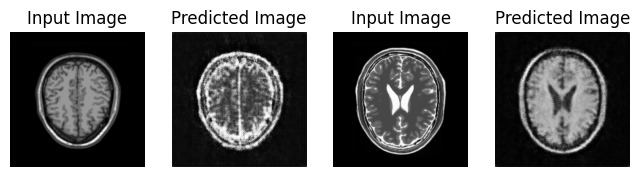

Saving checkpoint for epoch 65 at ./Trained_Model/ckpt-65


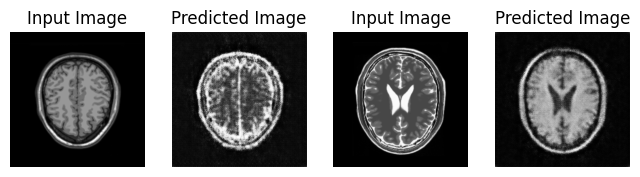

Saving checkpoint for epoch 66 at ./Trained_Model/ckpt-66


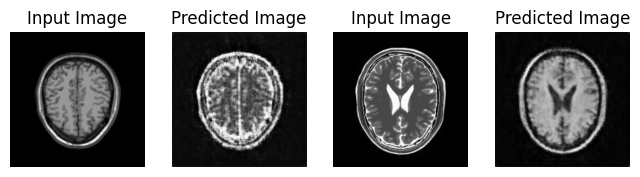

In [ ]:
for epoch in range(1, epoch+1):
    for image_x, image_y in tf.data.Dataset.zip((t1Images_data, t2Images_data)):
        train_step(image_x, image_y)
    generate_images(generator_g, sample_t1Images_data, generator_f, sample_t2Images_data, epoch)
    ckpt_save_path = ckpt_manager.save()
    print('Saving checkpoint for epoch', epoch, 'at', ckpt_save_path)

# **Generating a GIF for visualization of Results**
Notice the Quality of results we are getting.

In [1]:
anim_file = 'cyclegan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('generatedImages/image_at_epoch*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filenames)
  writer.append_data(image)

NameError: name 'imageio' is not defined

In [ ]:
from IPython.display import Image
Image(url='cyclegan.gif')